# Lab assignment 1: Classification
+ Ana Rotella Fernandez
+ Marta Simón Pinacho
+ Ana Miguélez Martínez

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snsç
import numpy as np
import xlrd # Para excels
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

### 1. Exploratory Data Analysis (EDA)

#### STEP 1: IMPORT DATASET

In [2]:
### Load file --------------------------------------------
diabetes = pd.read_csv('Diabetes.csv', sep = ";")
diabetes

,PREGNANT,GLUCOSE,BLOODPRESS,SKINTHICKNESS,INSULIN,BODYMASSINDEX,PEDIGREEFUNC,AGE,DIABETES
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### STEP 2: CHECK OUT THE MISSING VALUES

In [3]:
### Info and type of variables & missing, veo cuantos valores non-null para todos los variables
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PREGNANT       768 non-null    int64  
 1   GLUCOSE        768 non-null    int64  
 2   BLOODPRESS     768 non-null    int64  
 3   SKINTHICKNESS  768 non-null    int64  
 4   INSULIN        768 non-null    int64  
 5   BODYMASSINDEX  768 non-null    float64
 6   PEDIGREEFUNC   768 non-null    float64
 7   AGE            768 non-null    int64  
 8   DIABETES       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# How many NAs?
print('Number of NAs in dataframe:',diabetes.isnull().values.sum()) 
diabetes.isnull().any() # Are there any NAs? No,there are not any NAs

Number of NAs in dataframe: 0


PREGNANT         False
GLUCOSE          False
BLOODPRESS       False
SKINTHICKNESS    False
INSULIN          False
BODYMASSINDEX    False
PEDIGREEFUNC     False
AGE              False
DIABETES         False
dtype: bool

#### STEP 3: PLOT THE DATA AND CHECK OUT FOR OUTLIERS

In [5]:
diabetes.describe()

,PREGNANT,GLUCOSE,BLOODPRESS,SKINTHICKNESS,INSULIN,BODYMASSINDEX,PEDIGREEFUNC,AGE,DIABETES
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


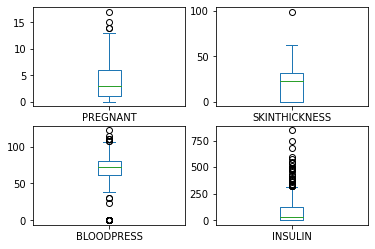

In [6]:
ax = diabetes.loc[:, ["PREGNANT","SKINTHICKNESS", "BLOODPRESS", "INSULIN"]].plot.box(
    subplots=True, layout=(2,2), sharex=False, sharey=False)

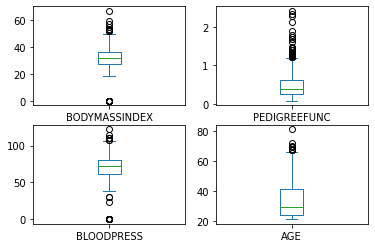

In [7]:
ax = diabetes.loc[:, ["BODYMASSINDEX","PEDIGREEFUNC", "BLOODPRESS", "AGE"]].plot.box(
    subplots=True, layout=(2,2), sharex=False, sharey=False)

In [8]:
## FALTA DECIDIR QUE HACER CON LOS OUTLIERS, SI BORRARLOS O QUE HACER CON ELLOS

In [9]:
## LA DE DIABETES COMO ES 0 O 1 NO TIENE MUCHO SENTIDO HACERLO

### STEP 4: ENCODE CATEGORICAL VARIABLES

In [10]:
#There are no categorical input variables, but 'DIABETES' would be a categorical value.
### Convert output variable to factor, in this case 'DIABETES' is a categorical variable.
diabetes.DIABETES = diabetes.DIABETES.astype('category') 
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PREGNANT       768 non-null    int64   
 1   GLUCOSE        768 non-null    int64   
 2   BLOODPRESS     768 non-null    int64   
 3   SKINTHICKNESS  768 non-null    int64   
 4   INSULIN        768 non-null    int64   
 5   BODYMASSINDEX  768 non-null    float64 
 6   PEDIGREEFUNC   768 non-null    float64 
 7   AGE            768 non-null    int64   
 8   DIABETES       768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


### STEP 5: EXPLORATORY ANALYSIS
Correlation plot of numeric variables

In [11]:
diabetes.DIABETES.value_counts()

0    500
1    268
Name: DIABETES, dtype: int64

In [12]:
# QUITAMOS LOS OTLIERS DE BODYMASSINDEX
price_iqr = stats.iqr(diabetes.BODYMASSINDEX)
print(f"Rango intercuartílico: {price_iqr}")
# Para localizar el primer y tercer cuartil.
price_q1, price_q3 = np.quantile(diabetes.BODYMASSINDEX, [0.25, 0.75])

# Limites de los valores atípicos
cut_low = price_q1 - 1.5 * price_iqr
cut_high = price_q3 + 1.5 * price_iqr

print("Lower and upper outlier limits:", cut_low, ", ", cut_high)

# Obtenemos de nuestro dataset todos los valores atípicos segun los limites calculados
price_outliers_index = diabetes.loc[(diabetes.BODYMASSINDEX < cut_low) | (diabetes.BODYMASSINDEX > cut_high)].index

print("The outliers are", len(price_outliers_index))

price_outliers
# Representación mediante boxpots (sección gráficos)

Rango intercuartílico: 9.3
Lower and upper outlier limits: 13.35 ,  50.550000000000004
The outliers are 19


NameError: name 'price_outliers' is not defined

In [ ]:
# Localizamos los valores de pctUrban mayores que 10 y menores que 90
# Eliminamos estas filas del dataframe
diabetes.drop(index = price_outliers_index, inplace = True)

In [ ]:
# QUITAMOS LOS OTLIERS DE BODYMASSINDEX
price_iqr = stats.iqr(diabetes.BLOODPRESS)
print(f"Rango intercuartílico: {price_iqr}")
# Para localizar el primer y tercer cuartil.
price_q1, price_q3 = np.quantile(diabetes.BLOODPRESS, [0.25, 0.75])

# Limites de los valores atípicos
cut_low = price_q1 - 1.5 * price_iqr
cut_high = price_q3 + 1.5 * price_iqr

print("Lower and upper outlier limits:", cut_low, ", ", cut_high)

# Obtenemos de nuestro dataset todos los valores atípicos segun los limites calculados
price_outliers_index = diabetes.loc[(diabetes.BLOODPRESS < cut_low) | (diabetes.BLOODPRESS > cut_high)].index

print("The outliers are", len(price_outliers_index))

price_outliers

In [ ]:
# Localizamos los valores de pctUrban mayores que 10 y menores que 90
# Eliminamos estas filas del dataframe
diabetes.drop(index = price_outliers_index, inplace = True)

In [ ]:
# import library
from imblearn.over_sampling import SMOTE
smote = SMOTE()

x = diabetes.loc[:, diabetes.columns != 'DIABETES']
y = diabetes.DIABETES
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)
print('Original dataset shape', len(y))
print('Resample dataset shape', len(y_smote))
diabetes_new = x_smote
diabetes_new['DIABETES']=y_smote
diabetes_new.describe()

In [ ]:
diabetes.SKINTHICKNESS.value_counts().sort_index()

In [ ]:
ax = diabetes_new.loc[:, "SKINTHICKNESS"].plot.box()

In [ ]:
# QUITAMOS LOS OTLIERS DE BODYMASSINDEX
price_iqr = stats.iqr(diabetes.SKINTHICKNESS)
print(f"Rango intercuartílico: {price_iqr}")
# Para localizar el primer y tercer cuartil.
price_q1, price_q3 = np.quantile(diabetes.SKINTHICKNESS, [0.25, 0.75])

# Limites de los valores atípicos
cut_low = price_q1 - 1.5 * price_iqr
cut_high = price_q3 + 1.5 * price_iqr

print("Lower and upper outlier limits:", cut_low, ", ", cut_high)

# Obtenemos de nuestro dataset todos los valores atípicos segun los limites calculados
price_outliers_index = diabetes.loc[(diabetes.SKINTHICKNESS < cut_low) | (diabetes.SKINTHICKNESS > cut_high)].index

print("The outliers are", len(price_outliers_index))

price_outliers

In [ ]:
# QUITAMOS LOS OTLIERS DE BODYMASSINDEX
var_iqr = stats.iqr(diabetes.SKINTHICKNESS)
# Para localizar el primer y tercer cuartil.
var_q1, var_q3 = np.quantile(diabetes.SKINTHICKNESS, [0.25, 0.75])

# Limites de los valores atípicos
cut_low = var_q1 - 1.5 * var_iqr
cut_high = var_q3 + 1.5 * var_iqr

print("Lower and upper outlier limits:", cut_low, ", ", cut_high)

# Obtenemos de nuestro dataset todos los valores atípicos segun los limites calculados
var_outliers_index = diabetes.loc[(diabetes.SKINTHICKNESS < cut_low) | (diabetes.SKINTHICKNESS > cut_high)].index

# Localizamos los valores de los outliers
# Eliminamos estas filas del dataframe
diabetes.drop(index = var_outliers_index, inplace = True)

In [ ]:
# stat = density --> para normalizar el eje y, el area total suma 1 (rel_freq)
dens_plot = sns.histplot(data = diabetes_new, x = 'BLOODPRESS', kde=True)#, stat='density')
# Editamos el color y grosor de la curva de densidad
dens_plot.lines[0].set_color('red')
dens_plot.lines[0].set_linewidth(3)

In [ ]:
! pip install imblearn

In [ ]:
### Load necessary modules -------------------------------
# interactive plotting
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’

# plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# Data management libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Machine learning libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# others
from mltools import classification_tools as CT
from mltools import model_tools as MT

In [ ]:
# ARBOL DE DECISION PARA VER LA IMPORTANCIA DE LAS VARIABLES
# Define input and output matrices
INPUTS = ['PREGNANT','GLUCOSE','BLOODPRESS','SKINTHICKNESS','INSULIN','BODYMASSINDEX','PEDIGREEFUNC','AGE']
OUTPUT = 'DIABETES'
X = diabetes_new[INPUTS]
y = diabetes_new[OUTPUT]

 

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,  #percentage of test data 20%
                                                    random_state=0, #seed for replication, es para que me salga la =
                                                    stratify = y)   #Preserves distribution of y


In [ ]:
## Create dataset to store model predictions
dfTR_eval = X_train.copy()
dfTR_eval['Y'] = y_train # We will call Y as output variable for simplicity
dfTS_eval = X_test.copy()
dfTS_eval['Y'] = y_test # We will call Y as output variable for simplicity>

In [ ]:
#-------------------------------------------------------------------------------------------------
#---------------------------- DECISION TREE MODEL ------------------------------------------------
#-------------------------------------------------------------------------------------------------
## Inputs of the model. Change accordingly to perform variable selection
INPUTS_DT = INPUTS

param = {'DT__min_impurity_decrease': np.arange(0,0.05,0.005)} # Minimum entropy to decrease in each split. Valor que vamos a usar para la validación cruzada. Los porcentajes de mejora varían en funcion del problema
pipe = Pipeline(steps=[('scaler', StandardScaler()), 
                       ('DT', DecisionTreeClassifier(criterion='gini',  # impuriry measure
                                                     min_samples_split=5, # Minimum number of obs in node to keep cutting. minimo numero de muestras en un split
                                                     min_samples_leaf=5, # Minimum number of obs in a terminal node. minimo numero de muestras en un nodo terminal.
                                                     random_state=150))]) # For replication

# We use Grid Search Cross Validation to find the best parameter for the model in the grid defined 
nFolds = 10
# el arbol lo vamos a obtener mediante grid search
tree_fit = GridSearchCV(estimator=pipe, # Structure of the model to use
                       param_grid=param, # Defined grid to search in
                       n_jobs=-1, # Number of cores to use (parallelize)
                       scoring='accuracy', # Accuracy https://scikit-learn.org/stable/modules/model_evaluation.html
                       cv=nFolds) # Number of Folds 
tree_fit.fit(X_train[INPUTS_DT], y_train) # Search in grid

In [ ]:
MT.plotModelGridError(tree_fit)

In [ ]:
## Plot the decision tree model
plt.figure(figsize=(12, 12))
plot_tree(tree_fit.best_estimator_['DT'], filled=True)
plt.show()

# si yo antes he escalado las variables (con el scaler), el arbol va a cortar por las variables normalizadas.
# Si quiero ver el valor real, debería quitar el escalado.

In [ ]:
## Plot the variable importance of each feature
plt.figure(figsize=(6 * 1.618, 6))
index = np.arange(len(X_train[INPUTS_DT].columns))
bar_width = 0.35
plt.bar(index, tree_fit.best_estimator_['DT'].feature_importances_, color='black', alpha=0.5)
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Feature importance')
plt.xticks(index, X_train[INPUTS_DT].columns)
plt.tight_layout()
plt.show()

In [ ]:
##  Obtain a report of the model based on predictions ---------------------------------------------
dfTR_eval['Y_DT_pred'] = tree_fit.predict(X_train[INPUTS_DT])
dfTR_eval['Y_DT_prob_neg'] = tree_fit.predict_proba(X_train[INPUTS_DT])[:,0]
dfTR_eval['Y_DT_prob_pos'] = tree_fit.predict_proba(X_train[INPUTS_DT])[:,1]
### Scale test using preprocess in training
dfTS_eval['Y_DT_pred'] = tree_fit.predict(X_test[INPUTS_DT])
dfTS_eval['Y_DT_prob_neg'] = tree_fit.predict_proba(X_test[INPUTS_DT])[:,0]
dfTS_eval['Y_DT_prob_pos'] = tree_fit.predict_proba(X_test[INPUTS_DT])[:,1]

#visualize evaluated data
dfTR_eval.head()
CT.plot2DClass(X_train[INPUTS_DT], dfTR_eval['Y'], tree_fit, 'GLUCOSE', 'BODYMASSINDEX', '0', 50)
dfTR_eval.head()

In [ ]:
CT.confusion_matrix(dfTR_eval['Y'], dfTR_eval['Y_DT_pred'],labels=['1','0'])